# Sentiment Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
path = 'yelp_data/health_text_sentiment.csv'

df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
2,4,Dr. Byrne is a great doctor! She has great bed...,0.513333,positive,dr byrne great doctor great bed side manner ex...,0.317778,positive
3,3,I'm raising my review as Dr Bryne's has been m...,-0.035714,negative,raise review dr bryne receptive daughter go an...,0.002806,positive
4,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative


## Lets focous only on One & Five stars for simplification

In [6]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
data = data.reset_index(drop=True)

In [7]:
data.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
2,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative
3,1,I went to the emergency room because i was hav...,0.137959,positive,go emergency room kidney stone attack emergenc...,0.133618,positive
4,5,Dr. Byrne is an excellent doctor with all the ...,0.250202,positive,dr byrne excellent doctor right skill include ...,0.210708,positive


## Plot

In [8]:
data.stars.value_counts()

5    31726
1    21988
Name: stars, dtype: int64

In [9]:
one_s = data[data.stars == 1]
five_s = data[data.stars == 5]

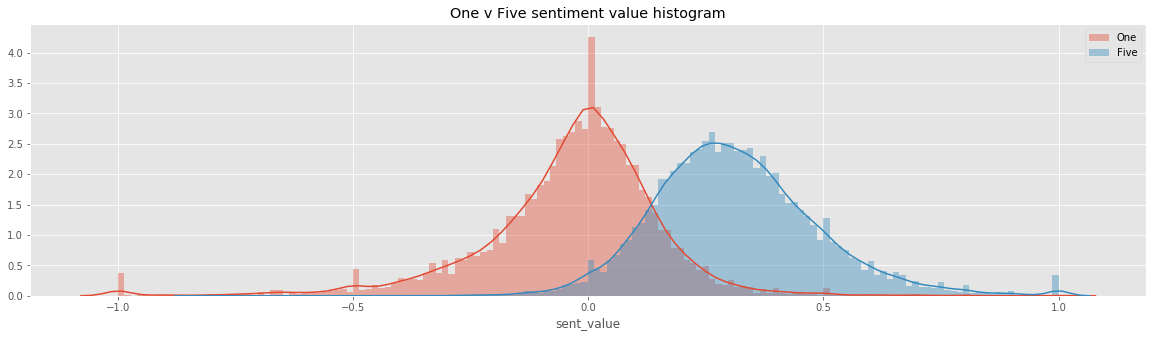

In [10]:
plt.figure(figsize=(20,5))
sns.distplot(one_s.sent_value,bins='auto',label='One')
sns.distplot(five_s.sent_value,bins='auto',label='Five')
plt.legend()
plt.title('One v Five sentiment value histogram')
plt.show()

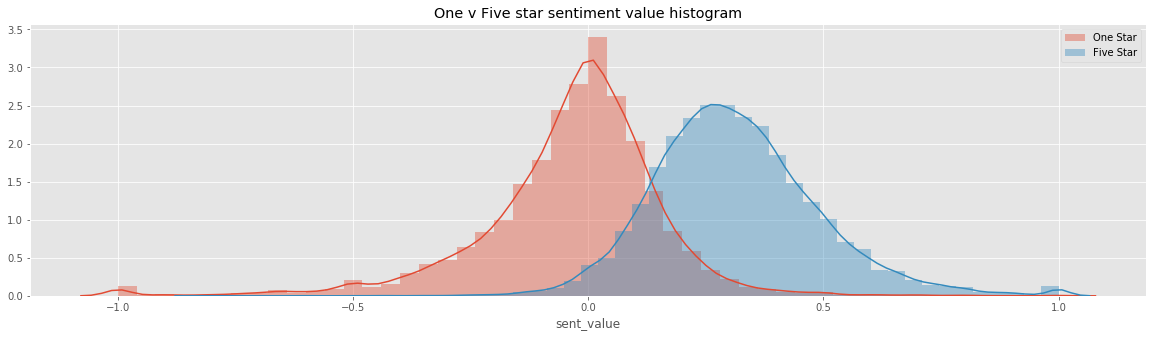

In [11]:
plt.figure(figsize=(20,5))
sns.distplot(one_s.sent_value,label='One Star')
sns.distplot(five_s.sent_value,label='Five Star')
plt.legend()
plt.title('One v Five star sentiment value histogram')
plt.show()

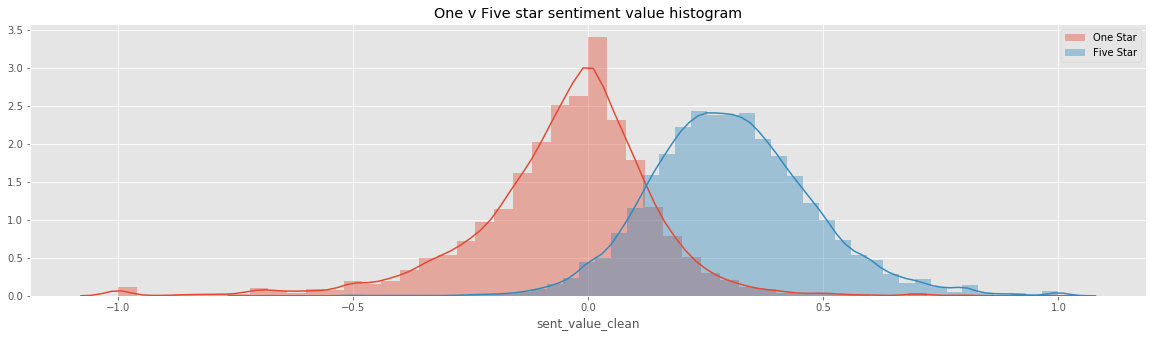

In [12]:
plt.figure(figsize=(20,5))
sns.distplot(one_s.sent_value_clean,label='One Star')
sns.distplot(five_s.sent_value_clean,label='Five Star')
plt.legend()
plt.title('One v Five star sentiment value histogram')
plt.show()

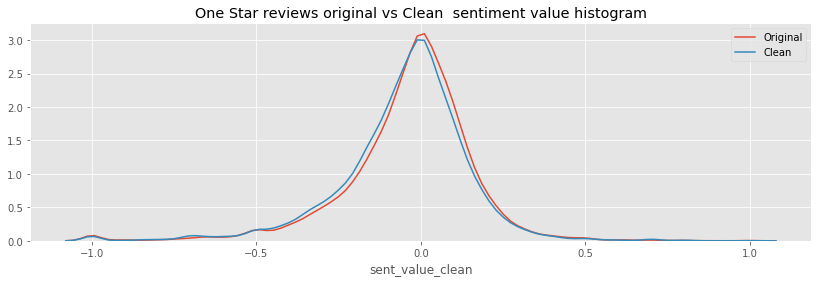

In [13]:
plt.figure(figsize=(14,4))
sns.distplot(one_s.sent_value,label='Original', rug=False, hist=False)
sns.distplot(one_s.sent_value_clean,label='Clean', rug=False, hist=False)
plt.legend()
plt.title('One Star reviews original vs Clean  sentiment value histogram')
plt.show()

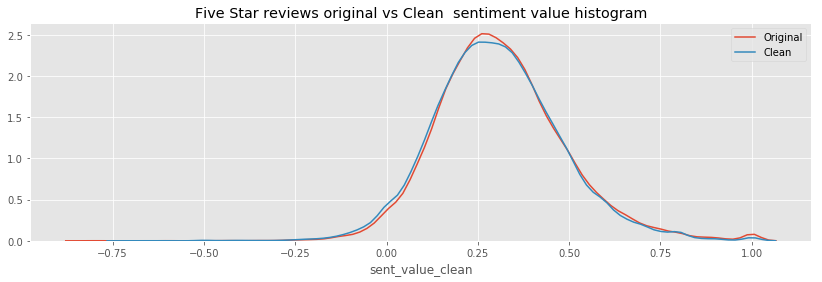

In [14]:
plt.figure(figsize=(14,4))
sns.distplot(five_s.sent_value,label='Original', rug=False, hist=False)
sns.distplot(five_s.sent_value_clean,label='Clean', rug=False, hist=False)
plt.legend()
plt.title('Five Star reviews original vs Clean  sentiment value histogram')
plt.show()

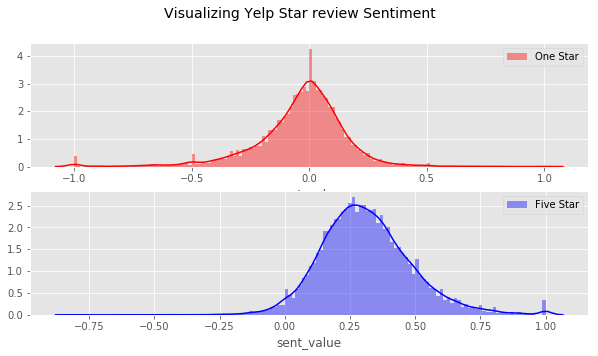

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
sp = sns.distplot(one_s.sent_value,bins='auto',label='One Star',ax=ax1,color='r')
ax1.legend()
sp2 = sns.distplot(five_s.sent_value,bins='auto',label='Five Star',ax=ax2,color='b')
ax2.legend()
t = f.suptitle('Visualizing Yelp Star review Sentiment', fontsize=14)

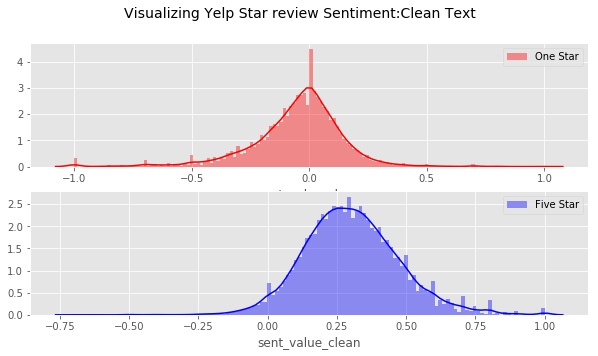

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
sp = sns.distplot(one_s.sent_value_clean,bins='auto',label='One Star',ax=ax1,color='r')
ax1.legend()
sp2 = sns.distplot(five_s.sent_value_clean,bins='auto',label='Five Star',ax=ax2,color='b')
ax2.legend()
t = f.suptitle('Visualizing Yelp Star review Sentiment:Clean Text', fontsize=14)


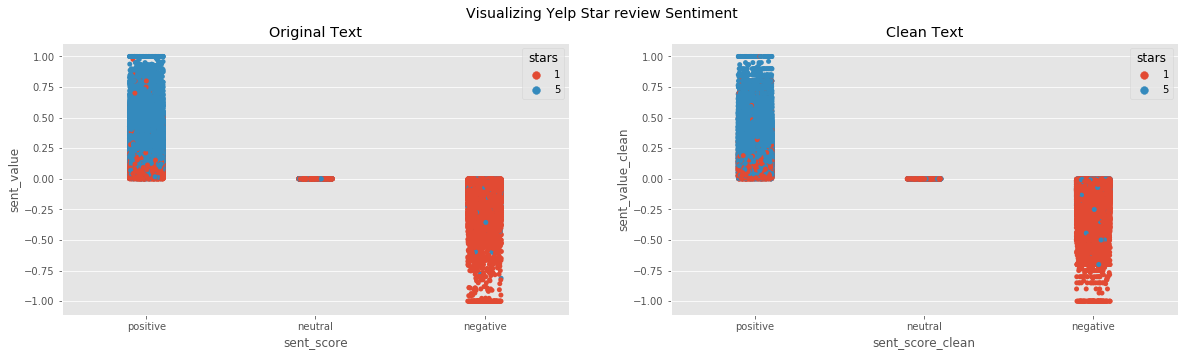

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sp = sns.stripplot(x='sent_score', y="sent_value", order = ['positive','neutral','negative'],
                   hue='stars', data=data, ax=ax1)
ax1.set_title('Original Text')

sp2 = sns.stripplot(x='sent_score_clean', y="sent_value_clean", order = ['positive','neutral','negative'],
                   hue='stars', data=data, ax=ax2)
ax2.set_title('Clean Text')

t = f.suptitle('Visualizing Yelp Star review Sentiment', fontsize=14)

In [ ]:
ax = data.boxplot(by=['stars'], figsize=(20,5))
plt.show()

In [18]:
data.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
2,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative
3,1,I went to the emergency room because i was hav...,0.137959,positive,go emergency room kidney stone attack emergenc...,0.133618,positive
4,5,Dr. Byrne is an excellent doctor with all the ...,0.250202,positive,dr byrne excellent doctor right skill include ...,0.210708,positive


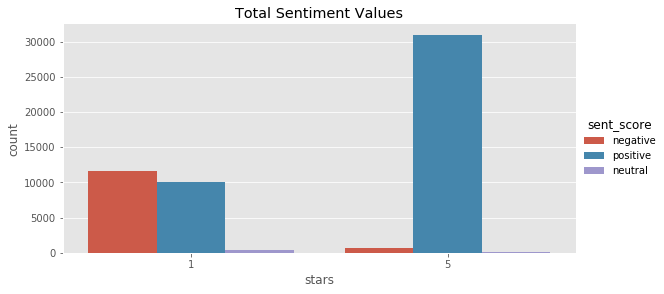

In [19]:
fc = sns.factorplot(x="stars", 
                    hue="sent_score", 
                    data=data, kind="count",size=4, aspect=2,legend=True)
plt.title("Total Sentiment Values")
plt.show()

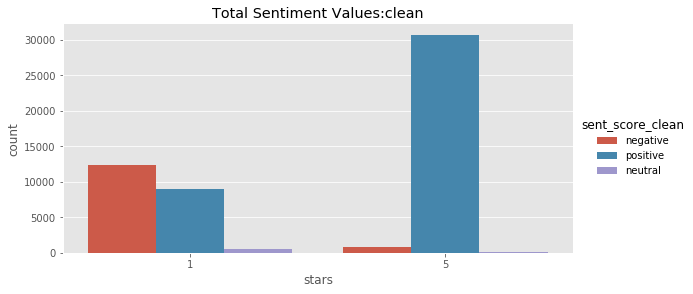

In [20]:
fc = sns.factorplot(x="stars", 
                    hue="sent_score_clean", 
                    data=data, kind="count",size=4, aspect=2,legend=True)
plt.title("Total Sentiment Values:clean")
plt.show()

In [ ]:
fc = sns.factorplot(x="stars", 
                    hue="sent_score", 
                    data=data, kind="count",size=4, aspect=2,legend=True,
                    palette={"negative": "#F11818", 
                             "positive": "#28F118", 
                             "neutral": "#18BCF1"})
plt.title("Total Sentiment Values")
plt.show()

In [ ]:
fc = sns.factorplot(x="stars", 
                    hue="sent_score_clean", 
                    data=data, kind="count",size=4, aspect=2,legend=True,
                    palette={"negative": "#F11818", 
                             "positive": "#28F118", 
                             "neutral": "#18BCF1"})
plt.title("Total Sentiment Values: Clean Text")
plt.show()

```
## What Changed
### Positive
- Original: 49408
- clean text:  47936
- result reduction of  1472

### Negative
- Original text:13917
- clean text: 15171
- result increase of 1254

## Neutral
- Original text: 681
- clean text :
- result increase of 218
```

## What Changed

### Positive
- Original:40940
- clean text: 39717
- result reduction of  1223

### Negative
- Original text:12205
- clean text: 13239
- result increase of 1034

## Neutral
- Original text: 569
- clean text :758
- result increase of 189

In [21]:
data.sent_score.value_counts()

positive    40940
negative    12205
neutral       569
Name: sent_score, dtype: int64

In [22]:
data.sent_score_clean.value_counts()

positive    39717
negative    13239
neutral       758
Name: sent_score_clean, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53714 entries, 0 to 53713
Data columns (total 7 columns):
stars               53714 non-null int64
text                53714 non-null object
sent_value          53714 non-null float64
sent_score          53714 non-null object
clean_text          53714 non-null object
sent_value_clean    53714 non-null float64
sent_score_clean    53714 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 2.9+ MB


In [24]:
data.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
2,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative
3,1,I went to the emergency room because i was hav...,0.137959,positive,go emergency room kidney stone attack emergenc...,0.133618,positive
4,5,Dr. Byrne is an excellent doctor with all the ...,0.250202,positive,dr byrne excellent doctor right skill include ...,0.210708,positive


In [25]:
data[data.isnull().any(axis=1)]


,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean


In [ ]:
data.sent_score

In [ ]:
data.sent_score_clean

## Find rows that did change

In [26]:
diff_sentiment = np.where(data.sent_score!= data.sent_score_clean)

In [27]:
diff_sentiment

(array([   17,    21,    22, ..., 53646, 53661, 53675]),)

In [30]:
change = data.ix[diff_sentiment]  # use original dataframe

In [31]:
change

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
17,1,i have never been treated so poorly in my life...,0.006890,positive,never treat poorly life never go back office u...,-0.032762,negative
21,1,I really like Dr Gibson and she has been the o...,0.085714,positive,really like dr gibson gyn feel comfortable tal...,-0.028571,negative
22,5,"I am new to the area, and I went for a yearly ...",-0.008155,negative,new area go yearly check different clinic horr...,0.004383,positive
26,1,Way to drop the ball. This office has a really...,-0.031614,negative,way drop ball office really hard time scheduli...,0.051701,positive
49,5,Presented to dr. Seiff with broke c2 in my nec...,0.018519,positive,present dr seiff broke c neck due car accident...,-0.010417,negative
65,1,I was on vacation and needed to go to the ER l...,-0.012500,negative,vacation need go er last labor day ultimately ...,0.004318,positive
68,1,This is the worst hospital I've ever been to. ...,-0.012500,negative,bad hospital ever go er tonight painful swolle...,0.002500,positive
71,5,Had a very bad experience with the ER/Hospital...,0.038750,positive,bad experience er hospital back time frame vow...,-0.041667,negative
78,5,I've read the other reviews and saw both good ...,0.045000,positive,read review see good bad area reluctance come ...,-0.052500,negative
79,1,Took my mom on 10/3/12 to this hospital and I...,-0.007143,negative,take mom hospital say never bad experience ano...,0.100000,positive


In [ ]:
change.info()

In [ ]:
change.head()

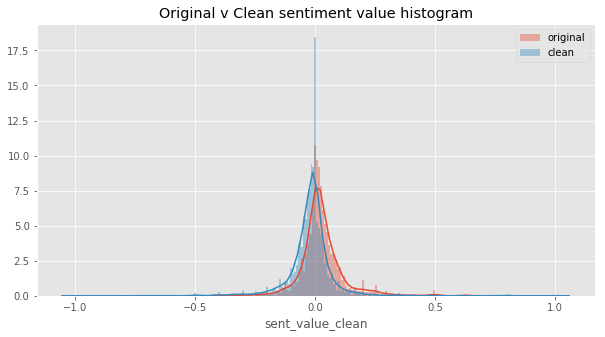

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(change.sent_value,bins='auto',label='original')
sns.distplot(change.sent_value_clean,bins='auto',label='clean')
plt.legend()
plt.title('Original v Clean sentiment value histogram')
plt.show()

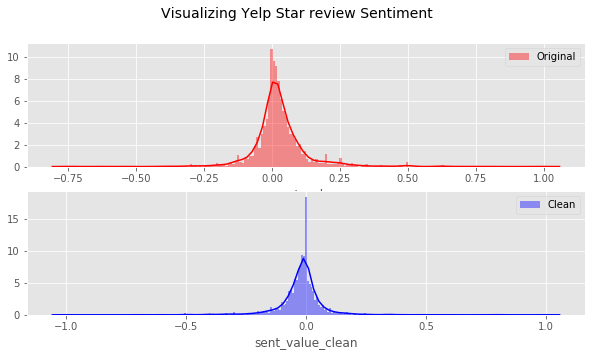

In [35]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
sp = sns.distplot(change.sent_value,bins='auto',label='Original',ax=ax1,color='r')
ax1.legend()
sp2 = sns.distplot(change.sent_value_clean,bins='auto',label='Clean',ax=ax2,color='b')
ax2.legend()
t = f.suptitle('Visualizing Yelp Star review Sentiment', fontsize=14)

In [52]:
change.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
17,1,i have never been treated so poorly in my life...,0.006890,positive,never treat poorly life never go back office u...,-0.032762,negative
21,1,I really like Dr Gibson and she has been the o...,0.085714,positive,really like dr gibson gyn feel comfortable tal...,-0.028571,negative
22,5,"I am new to the area, and I went for a yearly ...",-0.008155,negative,new area go yearly check different clinic horr...,0.004383,positive
26,1,Way to drop the ball. This office has a really...,-0.031614,negative,way drop ball office really hard time scheduli...,0.051701,positive
49,5,Presented to dr. Seiff with broke c2 in my nec...,0.018519,positive,present dr seiff broke c neck due car accident...,-0.010417,negative


In [55]:
onec = change[change.stars == 1]
fivec = change[change.stars == 5]

In [57]:
onec

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
17,1,i have never been treated so poorly in my life...,0.006890,positive,never treat poorly life never go back office u...,-0.032762,negative
21,1,I really like Dr Gibson and she has been the o...,0.085714,positive,really like dr gibson gyn feel comfortable tal...,-0.028571,negative
26,1,Way to drop the ball. This office has a really...,-0.031614,negative,way drop ball office really hard time scheduli...,0.051701,positive
65,1,I was on vacation and needed to go to the ER l...,-0.012500,negative,vacation need go er last labor day ultimately ...,0.004318,positive
68,1,This is the worst hospital I've ever been to. ...,-0.012500,negative,bad hospital ever go er tonight painful swolle...,0.002500,positive
79,1,Took my mom on 10/3/12 to this hospital and I...,-0.007143,negative,take mom hospital say never bad experience ano...,0.100000,positive
92,1,If I could give it a zero I would. There is a ...,-0.034762,negative,could give zero would reason switch name west ...,0.039153,positive
100,1,I am appalled at this hospital. I mean really ...,-0.038673,negative,appal hospital mean really concerned grandfath...,0.060565,positive
150,1,I had a difficult pregnancy from the get go. T...,0.005256,positive,difficult pregnancy get go first pregnancy unp...,-0.040235,negative
152,1,My wife has seen Dr. Koon Desert West OBGYN fo...,0.242292,positive,wife see dr koon desert west obgyn past yrs ye...,-0.003000,negative


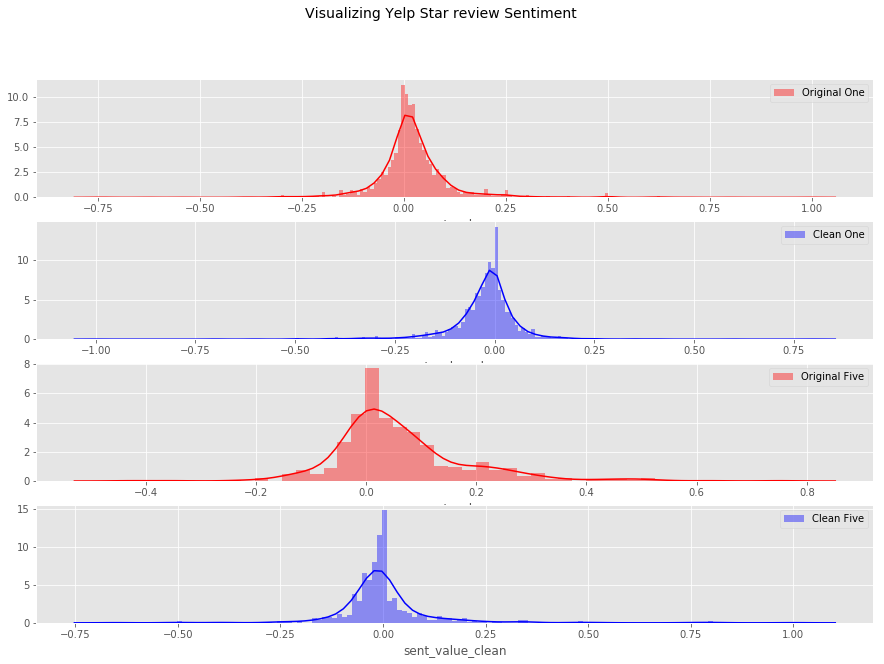

In [56]:
f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(15, 10))
sp = sns.distplot(onec.sent_value,bins='auto',label='Original One',ax=ax1,color='r')
ax1.legend()
sp2 = sns.distplot(onec.sent_value_clean,bins='auto',label='Clean One',ax=ax2,color='b')
ax2.legend()

sp3 = sns.distplot(fivec.sent_value,bins='auto',label='Original Five',ax=ax3,color='r')
ax3.legend()
sp4 = sns.distplot(fivec.sent_value_clean,bins='auto',label='Clean Five',ax=ax4,color='b')
ax4.legend()

t = f.suptitle('Visualizing Yelp Star review Sentiment', fontsize=14)
#plt.tight_layout()


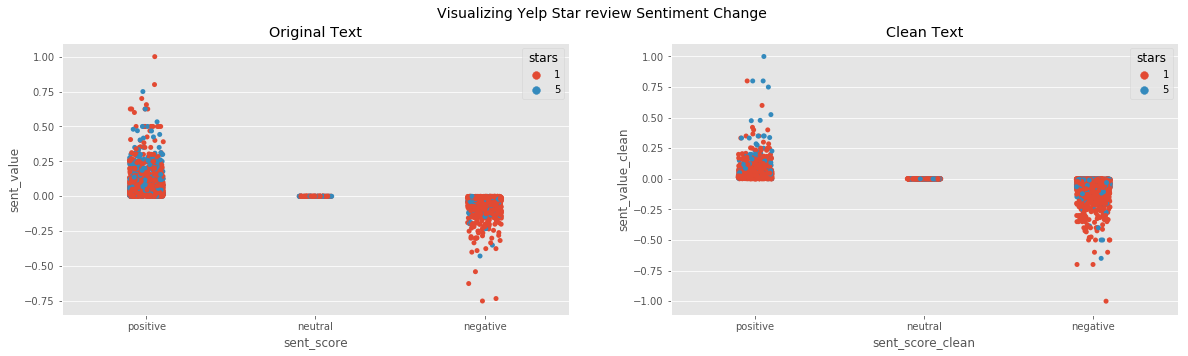

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sp = sns.stripplot(x='sent_score', y="sent_value", order = ['positive','neutral','negative'],
                   hue='stars', data=change, ax=ax1)
ax1.set_title('Original Text')

sp2 = sns.stripplot(x='sent_score_clean', y="sent_value_clean", order = ['positive','neutral','negative'],
                   hue='stars', data=change, ax=ax2)
ax2.set_title('Clean Text')

t = f.suptitle('Visualizing Yelp Star review Sentiment Change', fontsize=14)

## Results
- use clean up version